# Hands On #5

**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/05_neural_nets_with_keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

Due date: 2022-03-07

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"05_neural_nets_with_keras_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended for you to try to understand every line of code.   
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

### Task 1:
Fit the iris dataset into a Perceptron layer and predict the class of a sample with length 2 and width 0.5. 

Use: 
`max_iter=1000`, `tol =1e-3` and `random_state= 42`.





↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [3]:
# Declare the perceptron
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
# Fit the perceptron
per_clf.fit(X,y) 

Perceptron(random_state=42)

In [4]:
# Predict sample with length 2 and width 0.5
length = 2.0
width = 0.5
y_pred = per_clf.predict([[length,width]])

In [5]:
print('The predicted class is: ', y_pred[0])

The predicted class is:  1


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

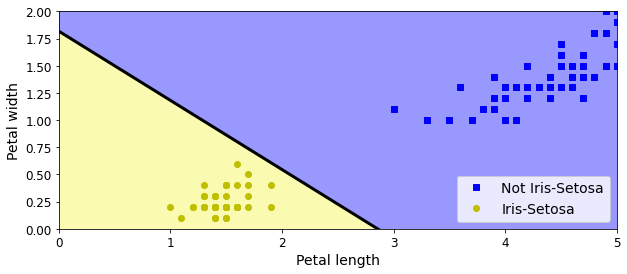

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

### Task 2
 Elaborate on the difference between a perceptron and logistic regression.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 2 answer: The Logistic Regression is capable of provide the probability for a each training instance to belong to a particular class, on the other hand, the Perceptron is capable of only choose the class which the training instance was classified.
In the concern of the data provided to the models, the Perceptron can only be applied if these data are linearly separable, hence, the Percepetrons are incapable of learning complex patterns, in comparison with the Logistic Regression models. 
The last can be solved by using a stack of Perceptrons, creating the Multi-Layer Perceptron (MLP). 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Activation functions

### Task 3
 Describe the role of activation functions within a neural network. What would be a neural network without these functions? 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 3 answer: The activation functions define the output of a set of inputs, deciding the activation of the neurons of the NN in order to get the desired output. It also performs a nonlinear transformation on the input, normalizing it to the a specific range, i.e. 0 to 1. This normalization can reduce the computational effort to the train the NN. 
Some examples for these activation functions are sigmoid, Rectified Linear Units (ReLU) and its variations, softmax, hyperbolic tangent (tanh), Heavside step-function. 
Without these functions the NN wouldn't be capable of learning process.  

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [33]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Rectified Linear Units function
def relu(x):
    return np.maximum(0,x)

# Get the derivative of a function f
def derivative(f,x,eps=1e-6):
    return (f(x + eps) - f(x - eps)) / (2*eps)

# Heaviside step function
def heaviside(x):
    return (x >= 0).astype(x.dtype)


# MLP Xor
def mlp_xor(x1,x2,activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-5.0, 5.0, -0.2, 1.2)

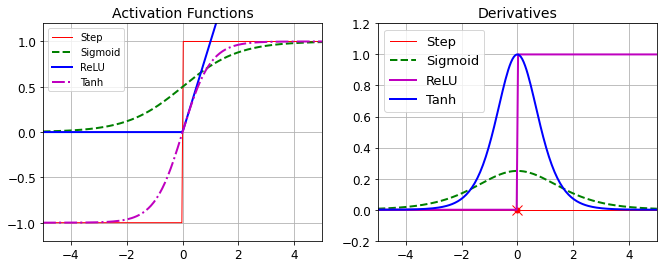

In [15]:
x = np.linspace(-5,5,200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(x, np.sign(x), 'r-', linewidth=1, label='Step')
plt.plot(x, sigmoid(x), 'g--', linewidth=2, label='Sigmoid')
plt.plot(x, relu(x), 'b-', linewidth=2, label='ReLU')
plt.plot(x, np.tanh(x), 'm-.', linewidth=2, label='Tanh')
plt.grid(True)
plt.legend(loc='center right', fontsize=14)
plt.title('Activation Functions', fontsize=14)
plt.axis([-5,5,-1.2,1.2])

plt.legend(loc='best')

plt.subplot(122)
plt.legend(loc='best')
plt.plot(x, derivative(np.sign,x), 'r-', linewidth=1, label='Step')
plt.plot(0, 0, 'ro', markersize=5)
plt.plot(0, 0, 'rx', markersize=10)
plt.plot(x, derivative(sigmoid,x), 'g--', linewidth=2, label='Sigmoid')
plt.plot(x, derivative(relu,x), 'm-', linewidth=2, label='ReLU')
plt.plot(x, derivative(np.tanh,x), 'b-', linewidth=2, label='Tanh')
plt.grid(True)
plt.legend(loc='upper left', fontsize=13)
plt.title('Derivatives', fontsize=14)
plt.axis([-5,5,-0.2,1.2])

In [39]:
x1s = np.linspace(-0.2,1.2, 100)
x2s = np.linspace(-0.2,1.2, 100)
x1,x2 = np.meshgrid(x1s,x2s) ## (2,) -> (2,2)

z1 = mlp_xor(x1, x2, activation=heaviside)    ## binary outputs
z2 = mlp_xor(x1, x2, activation=sigmoid)

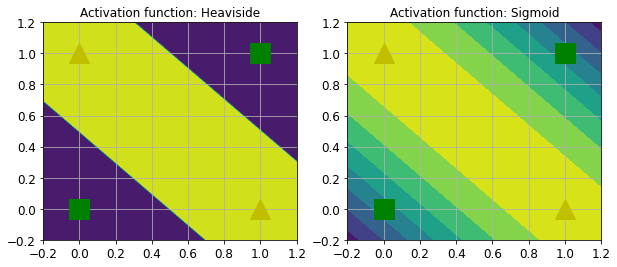

In [47]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1,x2,z1)
plt.plot([0,1],[0,1],'gs',markersize=20)
plt.plot([0,1],[1,0],'y^',markersize=20)
plt.title("Activation function: Heaviside", fontsize=12)
plt.grid(True)


plt.subplot(122)
plt.contourf(x1,x2,z2)
plt.plot([0,1],[0,1],'gs',markersize=20)
plt.plot([0,1],[1,0],'y^',markersize=20)
plt.title("Activation function: Sigmoid", fontsize=12)
plt.grid(True)





# Building an Image Classifier

First let's import TensorFlow and Keras.

In [55]:
import tensorflow as tf
from tensorflow import keras

Let's start by loading the [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [100]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [101]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [102]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [103]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

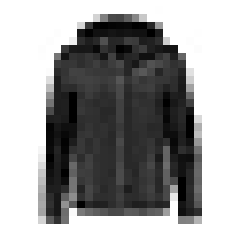

In [104]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [105]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [106]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [107]:
for i in range(10):
    print(i,class_names[y_train[i]])

0 Coat
1 T-shirt/top
2 Sneaker
3 Ankle boot
4 Ankle boot
5 Ankle boot
6 Coat
7 Coat
8 Dress
9 Coat


The validation set contains 5,000 images, and the test set contains 10,000 images:

In [108]:
X_valid.shape

(5000, 28, 28)

In [109]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

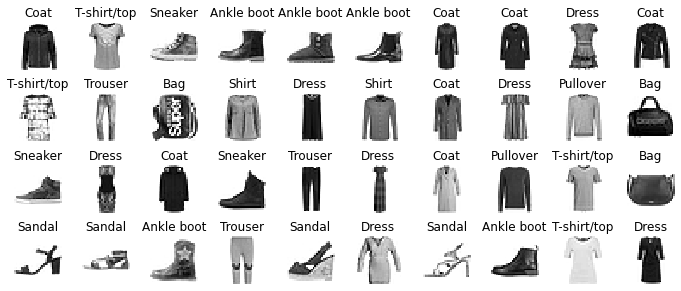

In [110]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Training a neural network using Keras:** In the cells below we  build an deep neural network model using Keras Sequential tool. The input is an image of shape 28 by 28. We use a network with 2 hidden layers with 300 and 100 neurons, respectively. The 'softmax' output activation function is used for multi-label classification.  

In [111]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [112]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),   # 28x28 image -> 784   
    keras.layers.Dense(300, activation="relu"),   # input layer
    keras.layers.Dense(100, activation="relu"),   # hidden layer
    keras.layers.Dense(10, activation="softmax")  # output layer (10 classes -> 10 neurons)
])

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [114]:
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


We can look at the layers directly:

In [115]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [116]:
model.get_layer(hidden1.name) is hidden1

True

In [117]:
weights, biases = hidden1.get_weights()

In [118]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [119]:
weights.shape

(784, 300)

In [120]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [121]:
biases.shape

(300,)

**Compilation:**  
We compile the model using the "sparse_categorical_crossentropy" loss function and "accuracy" as metric for a multi-label classification task. In addition, we choose the "sgd" optimizer.

In [123]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Now let's train the model for 30 epochs.

We save the most crucial parameters (['loss', 'accuracy', 'val_loss', 'val_accuracy']) in a dictionary named "history". 

In [124]:
# Training the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4843 - accuracy: 0.8317 - val_loss: 0.4350 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4392 - accuracy: 0.8456 - val_loss: 0.5355 - val_accuracy: 0.7970
Epoch 4/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3919 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3937 - accuracy: 0.8618 - val_loss: 0.3741 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3750 - accuracy: 0.8675 - val_loss: 0.3720 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3614 - val_ac

In [125]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [45]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

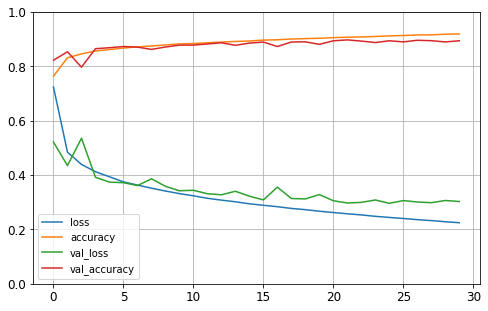

In [126]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Task 4
 Validate your model using `model.evaluate` on the test set made of `X_test` and `y_test`. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [50]:
# evaluate model on  test set
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3372 - accuracy: 0.8825


[0.33723148703575134, 0.8824999928474426]

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

### Task 5
 Select the first three samples from the test set and predict their corresponding classes using model.predict_classes . Then print the names/categories of the elements in  question (Eg. "Pants", "trouser") 

Hint: With `model.predict(...)` you can get the predictions in a [one-hot-encoded](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) format.
Use `np.argmax(prediction, axis=-1)` on the one-hot-encoded predictons to get the class numbers.

In [51]:
X_new = X_test[:3]

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [58]:
y_pred = np.argmax(model.predict(X_new),axis=-1) 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [71]:
y_pred[:3]

array([9, 2, 1])

In [ ]:
# class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [77]:
print('first sample classified as',y_pred[0],"=", class_names[9])
print('2nd sample classified as',y_pred[1],"=", class_names[2])
print('3rd sample classified as',y_pred[2],"=", class_names[1])

first sample classified as 9 = Ankle boot
2nd sample classified as 2 = Pullover
3rd sample classified as 1 = Trouser


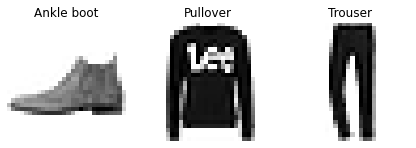

In [80]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset.

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing(as_frame=True)

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


### Task 6
 Scale your training, validation and test feature matrices using scikitlearn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [51]:
 # Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

### Task 7
 Build a Neural Network with one hidden layer with 30 neurons. The output layer has one neuron, which is the regression value. Compile, fit then train this network while choosing the suitable loss function and the SGD optimizer. 

**N.B:**  This task is similar to the neural network above, except that we now do regression not classification. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [63]:
model = keras.models.Sequential([ 
    keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),   # hidden layer with 30 neurons
    keras.layers.Dense(1)  # No need actv. function (Regression task)
])


# Compile the model
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.7566 - val_loss: 0.8845
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8452 - val_loss: 0.7877
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7734 - val_loss: 0.7356
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7197 - val_loss: 0.7007
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6758 - val_loss: 0.6628
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6374 - val_loss: 0.6355
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6046 - val_loss: 0.6097
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5756 - val_loss: 0.5865
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5497 - val_loss: 0.5667
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5274 - val_loss: 0.5488

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

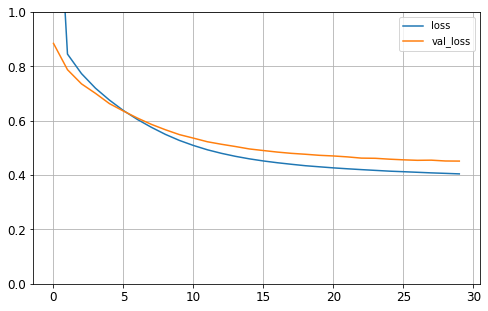

In [64]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Task 8
 Validate your model using model.evaluate on the test set. 
Also predict one element of the test set of your choice (`X_test[42]` for example) and compare to
the real value.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [71]:
# evaluate model on the test set
eval = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4086


In [75]:
# Predict one element of the test set
X_new = X_test[:1]
y_pred = model.predict(X_new)

In [76]:
y_pred

array([[0.5241285]], dtype=float32)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Saving the model weights for future use

In [128]:
model.save("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model/assets


In [129]:
model_reloaded = keras.models.load_model("my_keras_model")

In [130]:
model_reloaded.predict(X_test[42:43])

array([[1.9934718e-01, 1.0876349e-02, 3.6006460e-03, 1.2001576e-01,
        2.9764961e-02, 2.3362253e-08, 6.3532794e-01, 1.0310687e-06,
        1.0660281e-03, 1.0434947e-07]], dtype=float32)

In [133]:
model.save_weights("my_new_keras_weights.h5")

In [134]:
model.load_weights("my_new_keras_weights.h5")

## Looking at the saved weights

In [135]:
import h5py

In [136]:
f = h5py.File("my_new_keras_weights.h5")

<ipython-input-136-cf1eddd0ebb1>:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File("my_new_keras_weights.h5")


In [84]:
list(f.keys())

['dense_6', 'dense_7']

In [137]:
for name in f["dense_3/dense_3"]:
    print(name)

KeyError: 'Unable to open object (component not found)'

In [86]:
f["dense_3"]["dense_3"].keys()

KeyError: "Unable to open object (object 'dense_3' doesn't exist)"

In [ ]:
np.array(f["dense_3"]["dense_3"]["bias:0"])

In [ ]:
np.array(f["dense_3"]["dense_3"]["kernel:0"])

In [ ]:
f["dense_3"]["dense_3"]["kernel:0"].shape

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

One layer is actually nothing but performing a matrix multiplication, adding the bias and putting it through the activation function.
You can see this by looking at the shape of `dense_3`.

### Task 9
 For `X_train[0]` perform the forward pass yourself using matrix multiplications.
Remember to include the biases.
Check with the prediction of the model that you get exactly the same!

Hints:
- use `np.dot(x,y)` for matrix multiplication
- for the first layer it would look like this:
    * matrix mult: `X_new` dot `l1`
    * add bias `b1`
    * followed by `relu(...)`

In [138]:
b1 = np.array(f["dense_3"]["dense_3"]["bias:0"])
l1 = np.array(f["dense_3"]["dense_3"]["kernel:0"])
b2 = np.array(f["dense_4"]["dense_4"]["bias:0"])
l2 = np.array(f["dense_4"]["dense_4"]["kernel:0"])

KeyError: "Unable to open object (object 'dense_3' doesn't exist)"

In [ ]:
X_new = X_train[0]

In [ ]:
X_new.shape

In [ ]:
l1.shape

In [ ]:
b1.shape

In [ ]:
def relu(z):
    return np.maximum(0, z)

In [ ]:
model.predict(X_train[0:1])   # reproduce this!

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Optional task

**Exercise (bonus task, +3 points):**   
Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision.

 You can try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.
 Feel free to use other methods.

Let's load the dataset:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

Each pixel intensity is also represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
y_train

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc_encoder = OneHotEncoder()
ohc_encoder.fit(y_train.reshape(-1,1))
y_train_ohc = ohc_encoder.transform(y_train.reshape(-1,1))
y_valid_ohc = ohc_encoder.transform(y_valid.reshape(-1,1))
y_test_ohc = ohc_encoder.transform(y_test.reshape(-1,1))

In [ ]:
y_train_ohc.todense()

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above